## Coding Exercise #0511

In [1]:
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from nltk.corpus import stopwords
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')               # Turn the warnings off.
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>


False

### 1. NLP classification analysis:

#### 1.1. Read in data:
Movie review data from Cornell CS department. <br>
- The data can be found [here](https://www.cs.cornell.edu/people/pabo/movie-review-data). <br>
- Download the “polarity dataset” and unzip. <br>
- Under the "txt_sentoken” folder, there are “pos” and “neg" subfolders. <br>

In [2]:
# Specify the folder and read in the subfolders.
reviews = load_files('txt_sentoken/')
my_docs, y = reviews.data, reviews.target

In [3]:
len(my_docs)

2002

In [4]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1000, 1002]))

In [5]:
y

array([0, 0, 1, ..., 1, 0, 0])

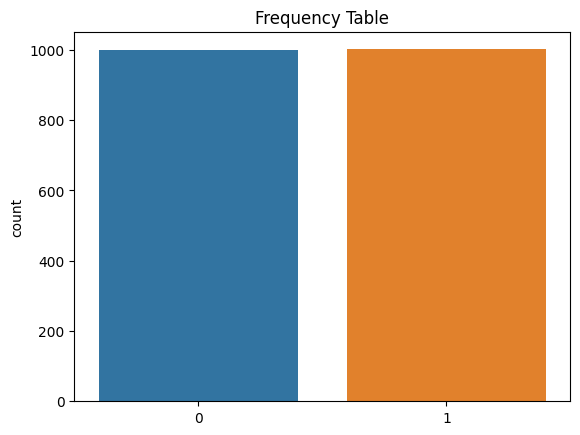

In [6]:
# Visualize the response variable.
sns.countplot(x=y).set_title("Frequency Table")
plt.show()

#### 1.2. Data pre-processing:

In [7]:
corpus = []
for i in range(0, len(my_docs)):
    review = re.sub(r'\W', ' ', str(my_docs[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+br\s+',' ',review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^b\s+', '', review)
    review = re.sub(r'\s+', ' ', review)               # Remove the excess white spaces introduced in the previous steps.
    corpus.append(review)  

In [8]:
# Just show a document.
corpus[0]

'by the numbers film which introduces characters situations dilemmas and developments that we ve seen before in parade of other films na film which can easily be guessed out by the end of frame number one na film which is packed to the cap with predictability leading to very little tension excitement suspense or interest on the part of its paying audience nin short clich ridden formula film nwelcome to my review of the general daughter nplot an undercover army detective and rape counselor find themselves locked inside an investigation into some bigwig general daughter rape torture and murder nthey must delve through all of the unspoken army rules and the hush hushes to figure out the conspiracy behind the shocking murder ncritique by the numbers see above nthis film is just there nit sits there on the big screen for couple of hours floats around goes away hopefully never to be heard from again nit is so predictable that even blind man could see its plot points coming mile away nit as s

In [9]:
len(corpus[0])

4475

#### 1.3. Create a TF IDF representation:

In [10]:
TFIDF = TfidfVectorizer(max_features = 1000, min_df = 2, max_df = 0.6, stop_words = stopwords.words('english'))
TFIDF.fit(corpus)                                          # Create a TF IDF model. 
X = TFIDF.transform(corpus).toarray()
X.shape

(2002, 1000)

#### 1.4. Logistic regression training and testing:

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)

In [12]:
# Training.
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [13]:
# Testing.
y_pred = LR.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [14]:
# Confusion matrix.
print(conf_mat)

[[239  57]
 [ 51 254]]


<Axes: >

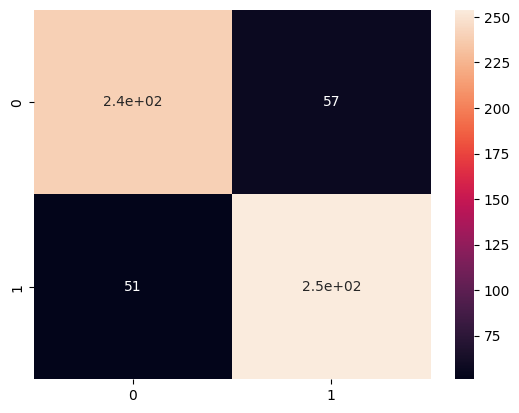

In [15]:
sns.heatmap(conf_mat, annot=True)

In [16]:
# Accuracy.
print(np.round(acc,3))

0.82


In [19]:
from sklearn.tree import DecisionTreeClassifier

# Instanciar
tree = DecisionTreeClassifier()

# Ajuste del modelo

tree.fit(X_train, y_train)

# pred
y_pred_tree = tree.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred_tree)
acc = accuracy_score(y_test, y_pred_tree)

<Axes: >

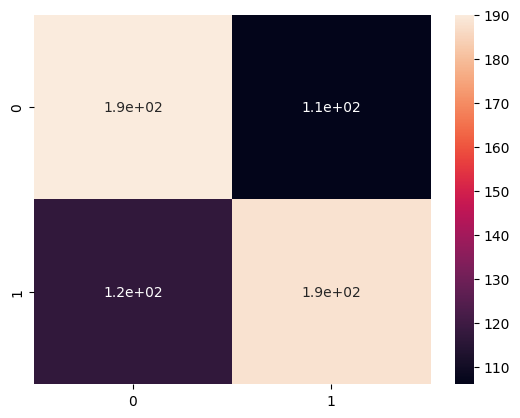

In [20]:
sns.heatmap(conf_mat, annot=True)

In [21]:
print(np.round(acc,3))

0.629


In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
hiperparametros = {'criterion': ['gini','entropy'],
                   'max_depth': np.arange(2,10), 
                   'ccp_alpha': np.logspace(-6,1,15), 
                   'min_samples_split': [2,5,10,20,50]
                   }

In [24]:
gridCV = GridSearchCV(tree, hiperparametros, cv=10, n_jobs = -1, verbose = 1)        # estimator = an instance of DecisionTreeClassifier.
gridCV.fit(X_train, y_train)
gridCV.best_params_

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


{'ccp_alpha': 0.01,
 'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_split': 2}

In [25]:
gridCV.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=8)

In [26]:
Y_pred_tree2 = tree.predict(X_test)    

In [27]:
conf_mat = confusion_matrix(y_test, Y_pred_tree2)
acc = accuracy_score(y_test, Y_pred_tree2)

<Axes: >

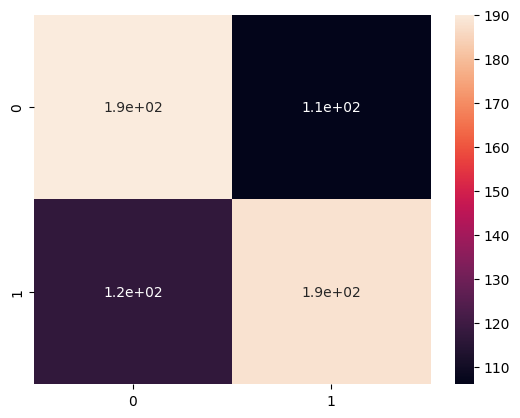

In [28]:
sns.heatmap(conf_mat, annot=True)

In [29]:
print(np.round(acc,3))

0.629


In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
# Training.
GB = GaussianNB()
GB.fit(X_train, y_train)

GaussianNB()

In [19]:
# Testing.
y_pred = GB.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [20]:
conf_mat

array([[240,  56],
       [ 92, 213]])

<Axes: >

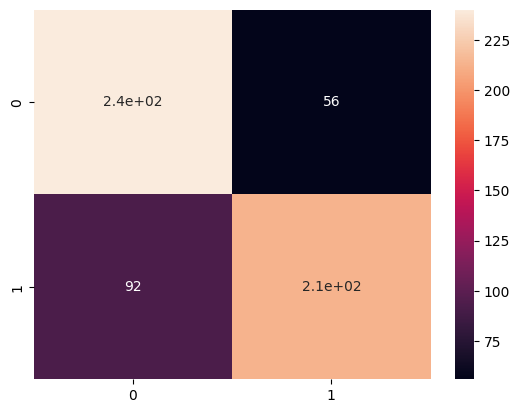

In [21]:
sns.heatmap(conf_mat, annot=True)

In [24]:
acc

0.7537437603993344

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
# Training.
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

MultinomialNB()

In [27]:
# Testing.
y_pred = MNB.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [28]:
conf_mat

array([[237,  59],
       [ 70, 235]])

<Axes: >

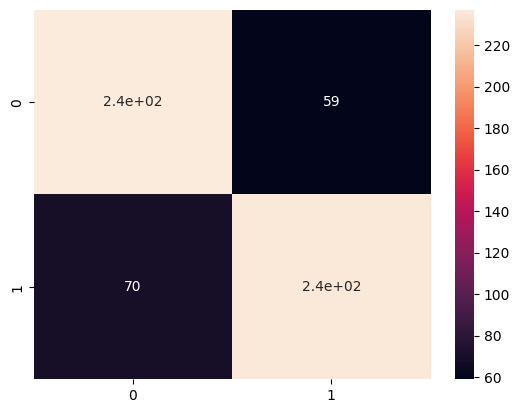

In [29]:
sns.heatmap(conf_mat, annot=True)

In [30]:
acc

0.7853577371048253

In [31]:
from sklearn.naive_bayes import CategoricalNB

In [32]:
# Training.
CNB = CategoricalNB()
CNB.fit(X_train, y_train)

CategoricalNB()

In [33]:
# Testing.
y_pred = CNB.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [34]:
conf_mat

array([[296,   0],
       [305,   0]])

<Axes: >

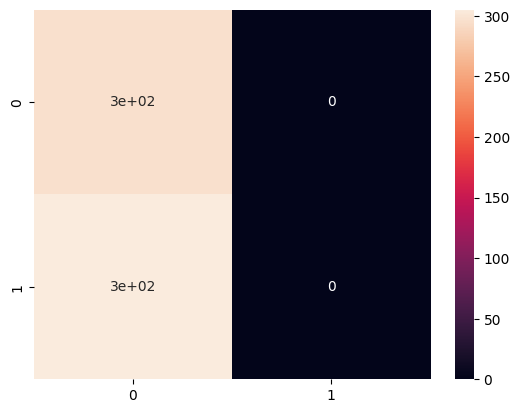

In [35]:
sns.heatmap(conf_mat, annot=True)

In [36]:
acc

0.4925124792013311

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
# Training.
RF = RandomForestClassifier(n_estimators = 1500, criterion= 'entropy', n_jobs= -1, min_samples_split = 10)
RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=10,
                       n_estimators=1500, n_jobs=-1)

In [73]:
# Testing.
y_pred = RF.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [74]:
conf_mat

array([[245,  51],
       [ 62, 243]])

<Axes: >

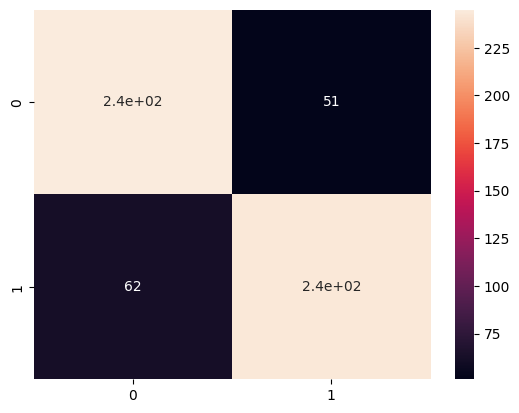

In [75]:
sns.heatmap(conf_mat, annot=True)

In [76]:
acc

0.8119800332778702